### Particle Swarm Optimization using Neural Networks

Here I'm implementing my PSO approach to solve TicTacToe.  I am using jupyter notebook because it saves each block of code to use on other blocks. We can first train our model using PSO and then play games using that model with different strategies.

In [1]:
# imports
from neural_network import NeuralNetwork
from board import *
from PSO import ParticleSwarmOptimizer
from tictactoe import *
import warnings
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (10,8)
#suppress warnings
warnings.filterwarnings('ignore')

#### Train the model
I am using a fully connected neural network with 1 hidden layer. There are 9 input neurons and 9 output neurons. The sigmoid activation function is used for the layers.

In [2]:
model = NeuralNetwork(num_inputs=9,num_hidden=36,num_outputs=9)
model.optimizeUsingPSO(iterations=50, num_particles=100, max_position=1, max_velocity=0.6)

Initializing swarm...
Optimizing swarm...
Global best:  0
Global best:  715
Global best:  715
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  995
Global best:  1071
Global best:  1071
Global best:  1071
Global best:  1071
Global best:  1071
Global best:  1071
Global best:  1071
Global best:  1071
Global best:  1071
Global best:  1071
Global best:  1071
Global best:  1071
Global best:  1071
Global best:  1071
Global bes

KeyboardInterrupt: 

#### Import a Saved Model
Alternately, you can import a saved model that I have already trained and is the best so far. 

In [2]:
from saved_model import *

model = NeuralNetwork(num_inputs=9,num_hidden=18,num_outputs=9)
model.update_weights(weights_ih_trained, weights_ho_trained)

Our model is trained now. We can now play games using our model. Below is the getMove method which uses our model's predict method to predict the next move.

In [19]:
# predicting moves now
def getMove(board, playerLetter):
    global model
    return model.predict(board, playerLetter)

In [34]:
print(list(model.best_history))

[1237, 26, 241, 1226, 228, 53, 27, 25, 78, 106, 578, 435, 23, 21, 313, 25, 1, 373, 334, 14, 10, 529, 27, 49, 22, 193, 7, 75, 192, 40, 77, 123, 0, 5, 9, 19, 541, 2, 597, 8, 41, 19, 3, 29, 338, 276, 628, 28, 903, 17, 21, 189, 0, 506, 641, 19, 36, 31, 13, 0, 1094, 3, 864, 506, 18, 78, 10, 70, 22, 93, 20, 728, 2, 11, 36, 161, 35, 13, 1, 38, 294, 77, 35, 22, 8, 559, 141, 5, 254, 139, 80, 8, 8, 22, 8, 536, 15, 75, 28, 19, 19, 1176, 1176, 1176, 1359, 1406, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419]


#### Testing the Model
Now, I am testing my model by playing it with multiple other agents.

Playing against Intelligent Agent:

In [21]:
(W,L,T) = PlayMultiple(500,getMove,getIntelligentMove)  #Simulate 500 matches between our PSO model and AI agent
print ('\nTotal games Played:\t{0}\nGames Won by Player 1\t:{1}\nGames Won by Player 2\t:{2}\nGames Tie:{3}'.format(500,W, L,T))
print("Accuracy:", (W/500)*100, "%")


Total games Played:	500
Games Won by Player 1	:500
Games Won by Player 2	:0
Games Tie:0
Accuracy: 100.0 %


Playing against Naive Agent:

In [32]:
(W,L,T) = PlayMultiple(500,getMove,getNaiveMove)  #Simulate 500 matches between our PSO model and naive agent
print ('\nTotal games Played:\t{0}\nGames Won by Player 1\t:{1}\nGames Won by Player 2\t:{2}\nGames Tie:{3}'.format(500,W, L,T))
print("Accuracy:", (W/500)*100, "%")


Total games Played:	500
Games Won by Player 1	:412
Games Won by Player 2	:87
Games Tie:1
Accuracy: 82.39999999999999 %


Playing against unIntelligent Agent:

In [33]:
(W,L,T) = PlayMultiple(500,getMove,getUnintelligentMove)  #Simulate 500 matches between our PSO model and unIntelligent agent
print ('\nTotal games Played:\t{0}\nGames Won by Player 1\t:{1}\nGames Won by Player 2\t:{2}\nGames Tie:{3}'.format(500,W, L,T))
print("Accuracy:", (W/500)*100, "%")


Total games Played:	500
Games Won by Player 1	:500
Games Won by Player 2	:0
Games Tie:0
Accuracy: 100.0 %


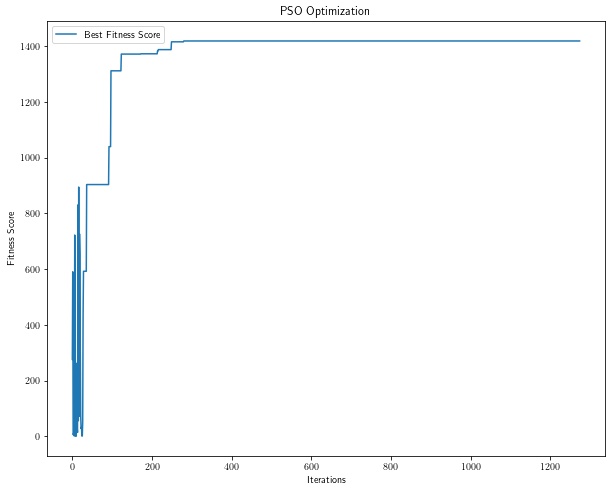

In [29]:
# Ploting learning curve
plt.plot(model.best_history, label=r'Best Fitness Score',)
plt.title(r'PSO Optimization')
plt.xlabel(r'Iterations')
plt.ylabel(r'Fitness Score')
plt.legend()
plt.savefig("best_fitness.png")